# Business Problem

The business problem is a binary classification problem. The  goal is to predict if the client contacted through the marketing campaign will subscribe a term deposit.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_train = pd.read_csv("bank-additional-full.csv")

In [3]:
data_train.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [4]:
data_train = pd.read_csv("bank-additional-full.csv", na_values =['NA'])
columns = data_train.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
data_train = data_train.values
data_train = [items[0].split(';') for items in data_train]
data_train = pd.DataFrame(data_train,columns = columns)

data_train['job'] = data_train['job'].str.replace('"', '')
data_train['marital'] = data_train['marital'].str.replace('"', '')
data_train['education'] = data_train['education'].str.replace('"', '')
data_train['default'] = data_train['default'].str.replace('"', '')
data_train['housing'] = data_train['housing'].str.replace('"', '')
data_train['loan'] = data_train['loan'].str.replace('"', '')
data_train['contact'] = data_train['contact'].str.replace('"', '')
data_train['month'] = data_train['month'].str.replace('"', '')
data_train['day_of_week'] = data_train['day_of_week'].str.replace('"', '')
data_train['poutcome'] = data_train['poutcome'].str.replace('"', '')
data_train['y'] = data_train['y'].str.replace('"', '')

In [5]:
data_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [6]:
data_test = pd.read_csv("bank-additional.csv", na_values =['NA'])
data_test = data_test.values
data_test = [items[0].split(';') for items in data_test]
data_test = pd.DataFrame(data_test,columns = columns)

data_test['job'] = data_test['job'].str.replace('"', '')
data_test['marital'] = data_test['marital'].str.replace('"', '')
data_test['education'] = data_test['education'].str.replace('"', '')
data_test['default'] = data_test['default'].str.replace('"', '')
data_test['housing'] = data_test['housing'].str.replace('"', '')
data_test['loan'] = data_test['loan'].str.replace('"', '')
data_test['contact'] = data_test['contact'].str.replace('"', '')
data_test['month'] = data_test['month'].str.replace('"', '')
data_test['day_of_week'] = data_test['day_of_week'].str.replace('"', '')
data_test['poutcome'] = data_test['poutcome'].str.replace('"', '')
data_test['y'] = data_test['y'].str.replace('"', '')

In [7]:
data_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


# Preprocessing the data

In [7]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [8]:
data = pd.concat([data_train, data_test])
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


# Dataset Description

In [10]:
data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,45307,45307,45307,45307,45307,45307,45307,45307,45307,45307,...,45307,45307,45307,45307,45307,45307,45307,45307,45307,45307
unique,78,12,4,6,3,3,3,2,10,5,...,42,27,8,3,10,26,26,316,11,2
top,31,admin.,married,basic,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
freq,2138,11434,27437,13744,35903,23751,37299,28796,15147,9483,...,19406,43632,39086,39086,17860,8521,8521,3142,17860,40216


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45307 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45307 non-null  object
 1   job             45307 non-null  object
 2   marital         45307 non-null  object
 3   education       45307 non-null  object
 4   default         45307 non-null  object
 5   housing         45307 non-null  object
 6   loan            45307 non-null  object
 7   contact         45307 non-null  object
 8   month           45307 non-null  object
 9   day_of_week     45307 non-null  object
 10  duration        45307 non-null  object
 11  campaign        45307 non-null  object
 12  pdays           45307 non-null  object
 13  previous        45307 non-null  object
 14  poutcome        45307 non-null  object
 15  emp.var.rate    45307 non-null  object
 16  cons.price.idx  45307 non-null  object
 17  cons.conf.idx   45307 non-null  object
 18  euribor

In [12]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='count', ylabel='job'>

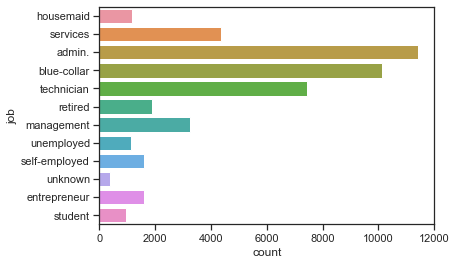

In [13]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)

In [14]:
data = data[data.job != 'unknown']

<AxesSubplot:xlabel='count', ylabel='marital'>

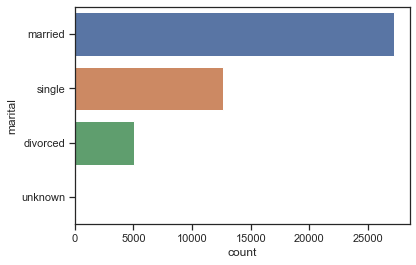

In [15]:
sns.countplot(y='marital', data=data)

In [16]:
data.marital.value_counts()

married     27175
single      12638
divorced     5043
unknown        82
Name: marital, dtype: int64

In [17]:
data = data[data.marital != 'unknown']
data = data[data.loan != 'unknown']

<AxesSubplot:xlabel='count', ylabel='education'>

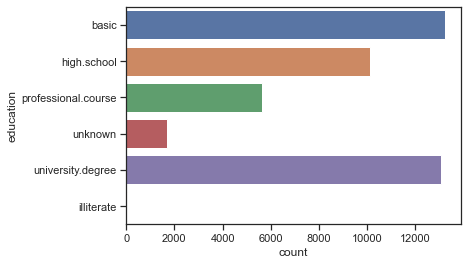

In [18]:
sns.countplot(y='education', data=data)

In [81]:
data = data[data.education != 'illiterate']

<AxesSubplot:xlabel='count', ylabel='campaign'>

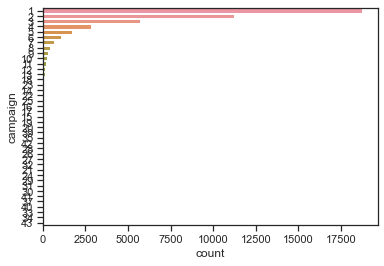

In [19]:
sns.countplot(y='campaign', data=data)

<AxesSubplot:xlabel='count', ylabel='y'>

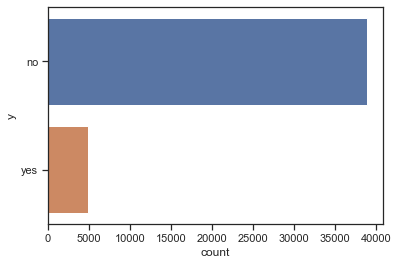

In [20]:
sns.countplot(y='y', data=data)

In [21]:
data = categorize(data)
data = data._convert(numeric=True)

# Outlier Checking

<AxesSubplot:xlabel='y', ylabel='duration'>

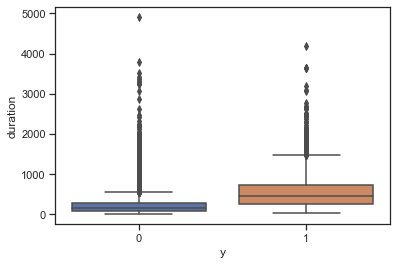

In [22]:
sns.boxplot(x='y', y='duration', data=data)

<AxesSubplot:xlabel='y', ylabel='education'>

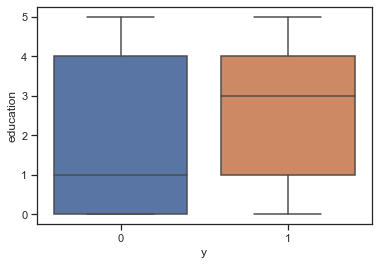

In [23]:
sns.boxplot(x='y', y='education', data=data)

<AxesSubplot:xlabel='y', ylabel='education'>

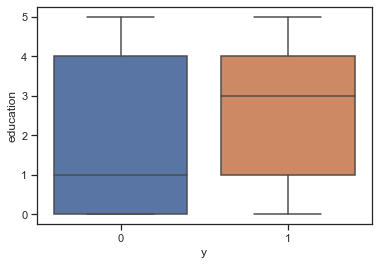

In [24]:
sns.boxplot(x='y', y='education', data=data)

<AxesSubplot:xlabel='y', ylabel='housing'>

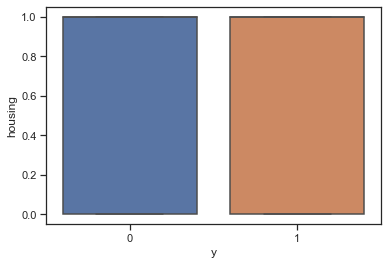

In [25]:
sns.boxplot(x='y', y='housing', data=data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='age'>

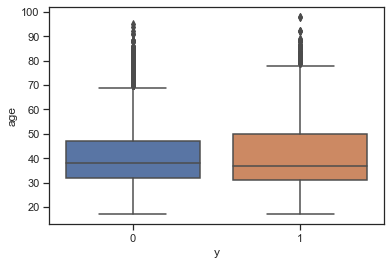

In [26]:
sns.boxplot(data['y'],data['age'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='job'>

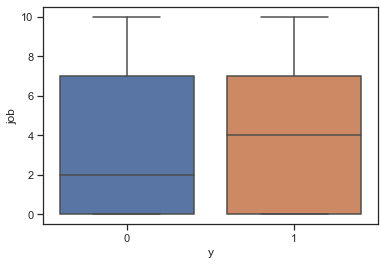

In [27]:
sns.boxplot(data['y'],data['job'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='campaign'>

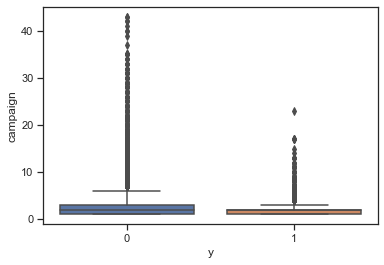

In [28]:
sns.boxplot(data['y'],data['campaign'])

# Removing outliers

In [29]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [30]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)

# Dropping less meaningful columns

<AxesSubplot:xlabel='education', ylabel='count'>

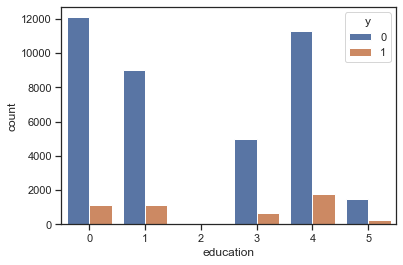

In [31]:
sns.countplot(x='education',hue='y',data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

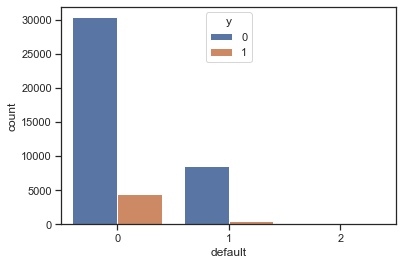

In [32]:
sns.countplot(x='default',hue='y',data=data)

It is skewed to 0. So We can drop this

In [33]:
data = data.drop('default',axis=1)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

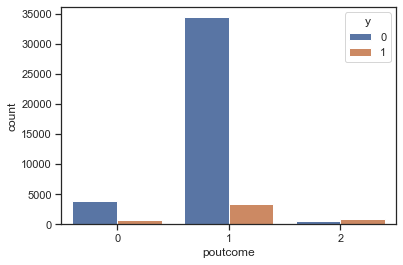

In [34]:
sns.countplot(x='poutcome',hue='y',data=data)

So many non existent values. We can drop this

In [35]:
data = data.drop('poutcome',axis=1)

<AxesSubplot:xlabel='loan', ylabel='count'>

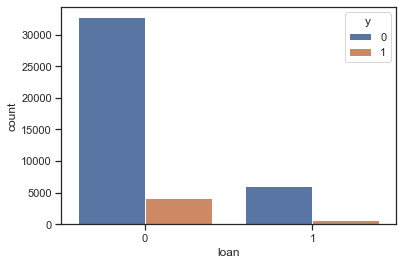

In [36]:
sns.countplot(x='loan',hue='y',data=data)

<AxesSubplot:xlabel='contact', ylabel='count'>

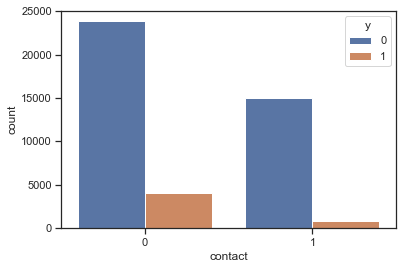

In [37]:
sns.countplot(x='contact',hue='y',data=data)

In [38]:
data = data.drop('contact',axis=1)

In [39]:
data = data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

In [40]:
data.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,y
0,56.0,3,1,0,0,0,6,1,261.0,1.0,999,0,0
1,57.0,7,1,1,0,0,6,1,149.0,1.0,999,0,0
2,37.0,7,1,1,1,0,6,1,226.0,1.0,999,0,0
3,40.0,0,1,0,0,0,6,1,151.0,1.0,999,0,0
4,56.0,7,1,1,0,1,6,1,307.0,1.0,999,0,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43767 entries, 0 to 4118
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          43767 non-null  float64
 1   job          43767 non-null  int32  
 2   marital      43767 non-null  int32  
 3   education    43767 non-null  int32  
 4   housing      43767 non-null  int32  
 5   loan         43767 non-null  int32  
 6   month        43767 non-null  int32  
 7   day_of_week  43767 non-null  int32  
 8   duration     43767 non-null  float64
 9   campaign     43767 non-null  float64
 10  pdays        43767 non-null  int64  
 11  previous     43767 non-null  int64  
 12  y            43767 non-null  int32  
dtypes: float64(3), int32(8), int64(2)
memory usage: 3.3 MB


# Correlation matrix of numerical features

In [42]:
corr_data= data[['age','job','marital','education','housing','loan','month','day_of_week','duration','campaign','pdays','previous','y']]
corr_data.corr()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,y
age,1.000000,-0.010307,-0.395168,-0.057310,-0.004140,-0.007438,-0.030256,-0.023745,0.003201,0.001104,-0.022426,0.014722,0.018045
job,-0.010307,1.000000,0.024212,0.113924,0.006973,-0.011273,-0.033073,-0.004001,-0.004288,-0.007703,-0.025568,0.020858,0.025570
marital,-0.395168,0.024212,1.000000,0.095408,0.010688,0.004776,-0.012736,0.002626,0.006407,-0.012412,-0.036341,0.037611,0.044798
education,-0.057310,0.113924,0.095408,1.000000,0.015425,0.007502,-0.091713,-0.017515,-0.013205,-0.002690,-0.051102,0.037886,0.063124
housing,-0.004140,0.006973,0.010688,0.015425,1.000000,0.048104,-0.019216,0.004176,-0.010426,-0.008926,-0.012364,0.022045,0.010505
loan,-0.007438,-0.011273,0.004776,0.007502,0.048104,1.000000,-0.008897,-0.008593,-0.005995,0.012669,0.000174,-0.003128,-0.004664
month,-0.030256,-0.033073,-0.012736,-0.091713,-0.019216,-0.008897,1.000000,0.027423,0.002469,-0.047809,-0.046070,0.100943,-0.004197
day_of_week,-0.023745,-0.004001,0.002626,-0.017515,0.004176,-0.008593,0.027423,1.000000,0.023641,-0.052468,-0.007223,-0.004653,0.013375
duration,0.003201,-0.004288,0.006407,-0.013205,-0.010426,-0.005995,0.002469,0.023641,1.000000,-0.024315,-0.053277,0.024751,0.407226
campaign,0.001104,-0.007703,-0.012412,-0.002690,-0.008926,0.012669,-0.047809,-0.052468,-0.024315,1.000000,0.048167,-0.065107,-0.050419


<AxesSubplot:>

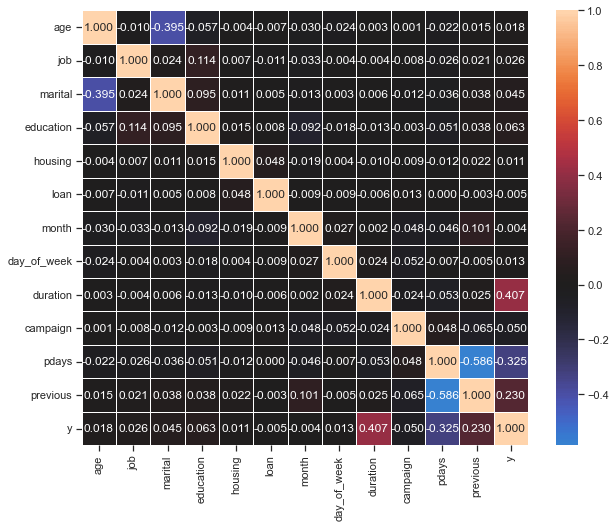

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_data.corr(), annot=True, fmt='0.3f', center=0,linewidths=.5)

# Univariate analysis

In [55]:
import sweetviz as sv
uni=sv.analyze(data)
uni.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


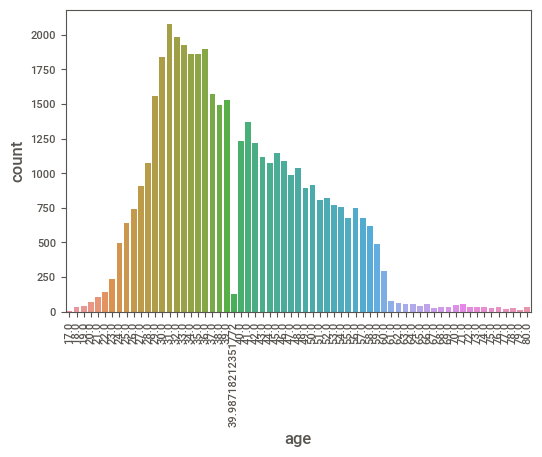

In [56]:
sns.countplot(x='age',data=data)
plt.xticks(rotation = 90)
plt.show()

Most momey deposit by younger

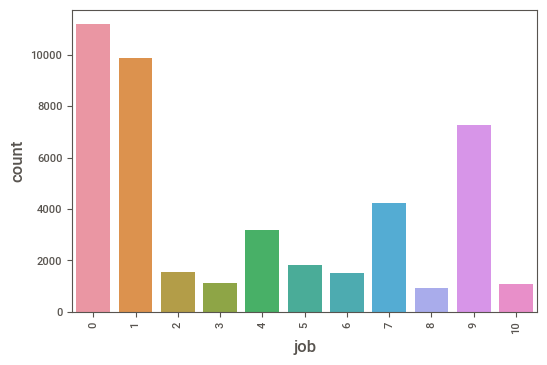

In [57]:
sns.countplot(x='job',data=data)
plt.xticks(rotation = 90)
plt.show()

more Admins people are deposited money

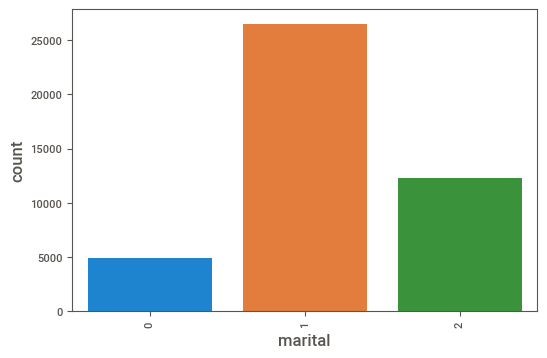

In [58]:
sns.countplot(x='marital',data=data)
plt.xticks(rotation = 90)
plt.show()

More married person are deposited money

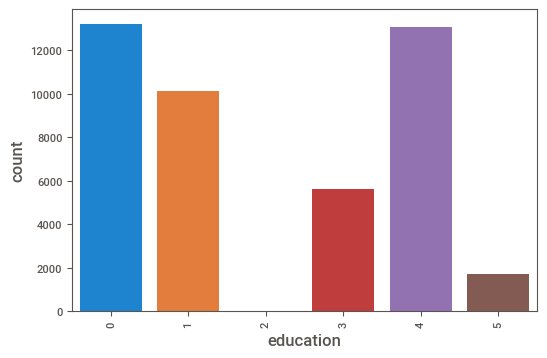

In [60]:
sns.countplot(x='education',data=data)
plt.xticks(rotation = 90)
plt.show()

Basic education people deposit more money

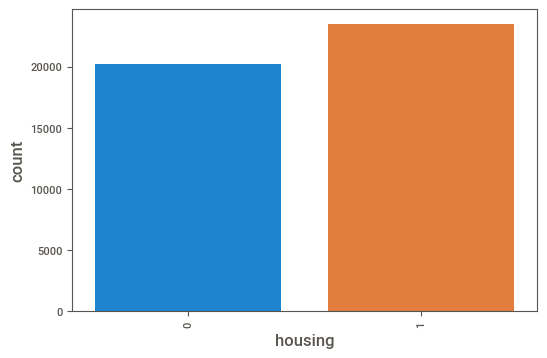

In [61]:
sns.countplot(x='housing',data=data)
plt.xticks(rotation = 90)
plt.show()

Those have house they deposit more money

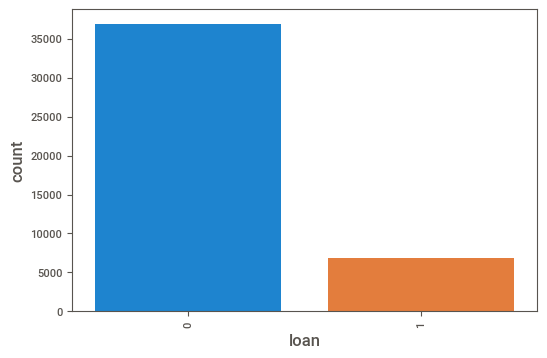

In [62]:
sns.countplot(x='loan',data=data)
plt.xticks(rotation = 90)
plt.show()

Who don't have loan they deposit more money

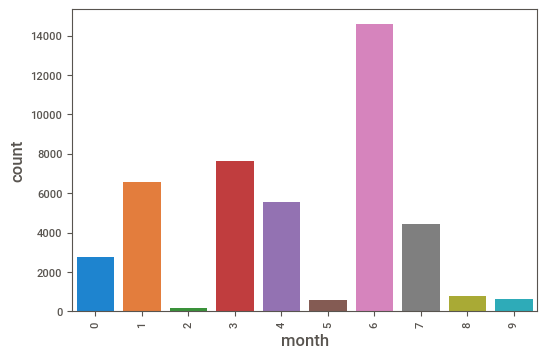

In [63]:
sns.countplot(x='month',data=data)
plt.xticks(rotation = 90)
plt.show()

Most people deposit money on may

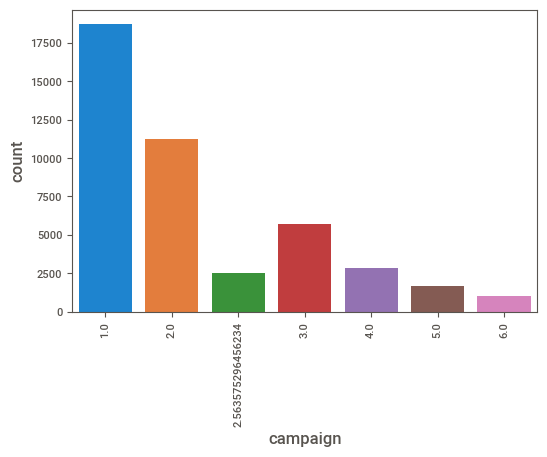

In [64]:
sns.countplot(x='campaign',data=data)
plt.xticks(rotation = 90)
plt.show()

Almost 19000 contact performed during campaign

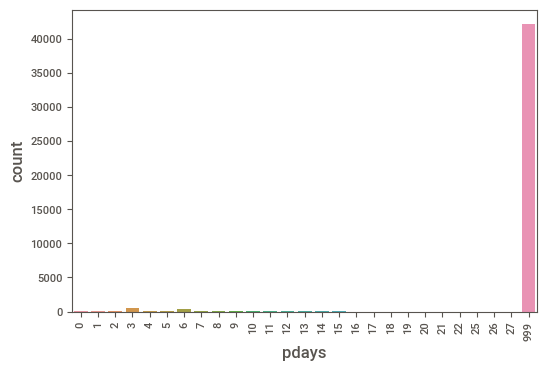

In [65]:
sns.countplot(x='pdays',data=data)
plt.xticks(rotation = 90)
plt.show()

people deposit money on very late after Campgain

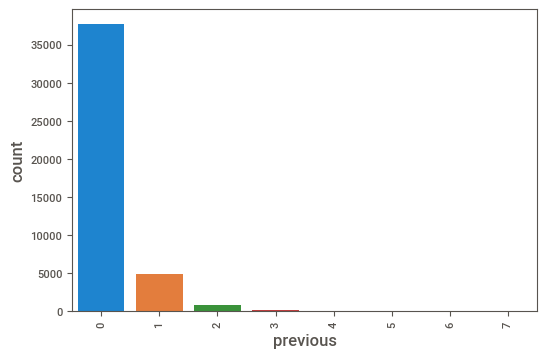

In [67]:
sns.countplot(x='previous',data=data)
plt.xticks(rotation = 90)
plt.show()

Before campgain most of the employee deposit the money

# Bi-variate Analysis

<AxesSubplot:xlabel='marital', ylabel='y'>

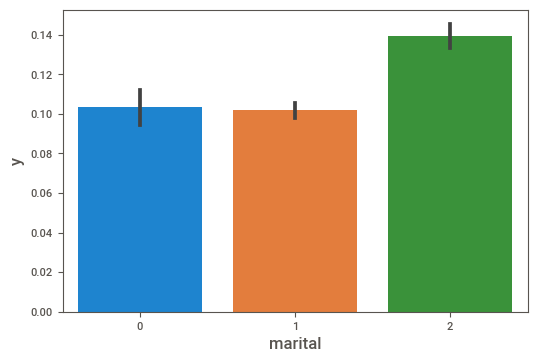

In [51]:
sns.barplot(x=data['marital'], y=data['y'])

<AxesSubplot:xlabel='job', ylabel='y'>

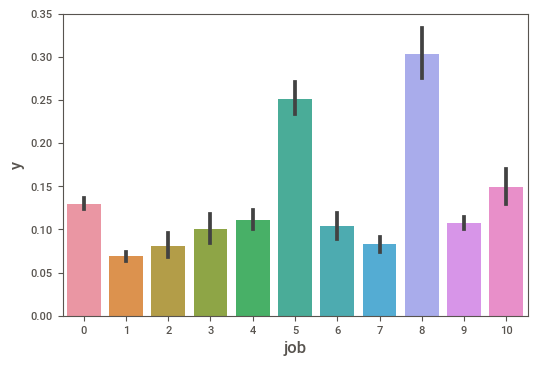

In [52]:
sns.barplot(x=data['job'], y=data['y'])

<AxesSubplot:xlabel='education', ylabel='y'>

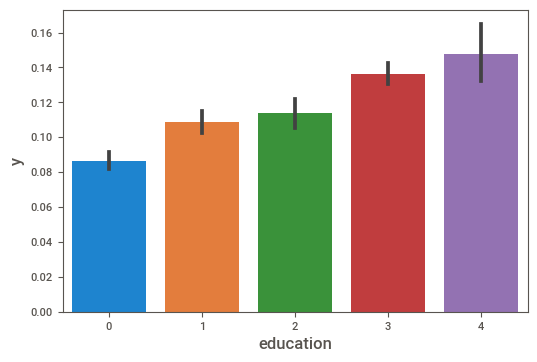

In [53]:
sns.barplot(x=data['education'], y=data['y'])

<AxesSubplot:xlabel='housing', ylabel='y'>

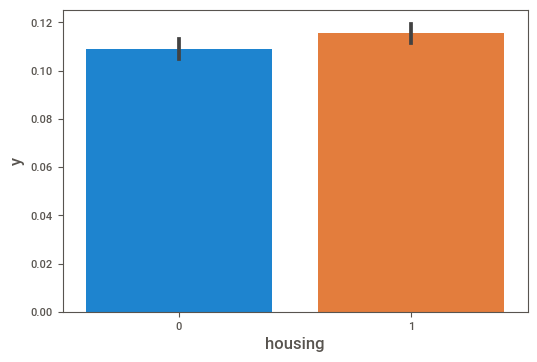

In [54]:
sns.barplot(x=data['housing'], y=data['y'])

<AxesSubplot:xlabel='loan', ylabel='y'>

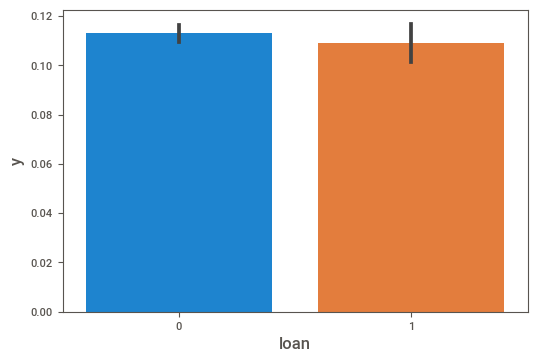

In [55]:
sns.barplot(x=data['loan'], y=data['y'])

<AxesSubplot:xlabel='previous', ylabel='y'>

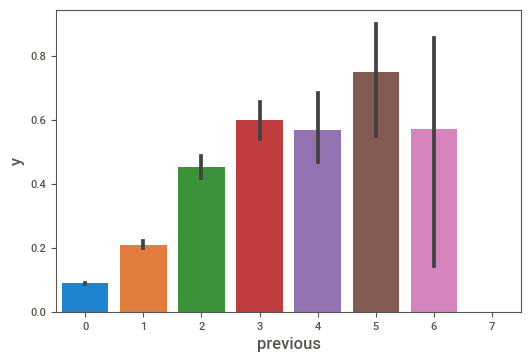

In [56]:
sns.barplot(x=data['previous'], y=data['y'])

In [46]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(data),columns=data.columns)

# Model development

In [47]:
X = data.drop('y',axis = 1).values
y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
# Data Normalization

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [50]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [51]:
X_train.shape

(32825, 10)

In [52]:
Y_train.shape

(32825,)

# Building different Models and validating using 10 fold cross validation

In [64]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10) #, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.9035995662058859
LDA: 0.8985707323442396
KNN: 0.8959804395183542
Decison-Tree: 0.8744324375325145
Gaussian: 0.897686836904297
SVM: 0.9023804721327773
RandForest: 0.9038433478742398
ADA: 0.8990278171682992


Logistic Regression obtained the highest accuracy with lesser runtime and is more stable in the results. Even SVM and Random Forest obtained the similar accuracy but have higher runtime compared to Logistic Regession

# Testing with the test data

In [70]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [71]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [72]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.9012526286915973
Confusion Matrix : 
 [[9611  126]
 [ 954  246]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9737
           1       0.66      0.20      0.31      1200

    accuracy                           0.90     10937
   macro avg       0.79      0.60      0.63     10937
weighted avg       0.88      0.90      0.88     10937



Conclusion:

Logistic regression score showing satasfication to the problem.